# Non linear regreshion model (Y = AX+B +(X^2/X^3/...))<br>

In [6]:
import pandas as pd
import numpy as np
import sklearn as skl

Load the dataset

In [8]:
df = pd.read_csv("../../Datasets/nonregdataex1.csv")
df.head(1)

,A,B,C,D,Target
0,60,-5,5,2,-3109


## Split to - X(Train), Y(Test) 
Create an X array that contains the features to train on, and a y array with the target variable - the Price column.
While we remove any non valuable data

### Degree , overfit model<br>
`Overfit model`/`High degree`/`Too complicated model`<br>
A situation when the model is too spesific to our train data. We trained it on too many features.<br>
The result is that the prediction of the train data is perfect, while the prediction of the test data isn't good.<br><br>
`Underfit model`/`Low degree`/`Too simple model`<br>
A situation when the model is too simple and can't predict good enugh the train data and the test data.<br><br>
degree=1 => 77% score (Underfit)<br>
degree=2 => 98% score (Good)<br>
degree=3 => 99% score (Perfect)<br>
degree=7 => 70% score (Overfit)

**Tips:**
* Always start with simpler models, and add complexity gradually, and only if it is really needed.
* If two models seem to perform equally well, choose the simpler one.
<img src="img/non-linear overfit.png" style="width:60%; float:left;">

In [23]:
from sklearn.preprocessing import PolynomialFeatures
cubic = PolynomialFeatures(degree=2)

We add features to our dataset using cubic. The columns number is as big as the degree. <br>
&nbsp;&nbsp;4 features (X) => A,B,C,D<br>
15 features (X_cubic) => A,B,C,D,A^2,B^2,C^2,D^2,AB,AC,AD,BC,BD,CD (The combinations for degree=2)

In [22]:
X = df[['A','B','C','D']]
X_cubic = cubic.fit_transform(X)

### Use sklearn.model_selection.train_test_split to split the data (train/test) <br>
We split the data to 70% and 30% , run the model on 70% data, and then test on the 30% and see if the results are close to the real values. 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cubic, df['Target'], test_size=0.3, random_state=42)

## Create the Model

In [6]:
import sklearn.linear_model as skl

In [7]:
model = skl.LinearRegression()

## Train the Model<br>
We send it the X and the Y and it findes the A , B (from Y = AX + B).

In [8]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Information about the Model

Display the model coefficient/weiht. (The A from Y = AX + B).<br><br>
If one of the coefs is really small we can delete his feature from the dataset, and retrain the model.<br>
But, first have to check that this column doesn't have big numbers (like a salary), and than it's fine that it's coef is small.

In [9]:
model.coef_

array([ 0.00000000e+00,  3.20219632e+01, -1.17476880e+03,  3.64003827e+02,
        1.38545637e+02,  2.33313014e-01,  6.78074497e-01, -1.32804348e-01,
       -9.16784037e+00, -5.37787267e+02,  1.22290085e+01,  2.70110325e+01,
       -1.78644921e+01,  6.58005862e+01, -4.86654339e+00])

Display the model intercept/bias (The B from Y = AX + B).<br>
The minimum value of every y (In this exmple, the minimum cose of every house).

In [10]:
model.intercept_

839.8117594786327

## Test the Model

Predict the test set, and than check it to decide if the model is good

In [11]:
predictions = model.predict(X_test)

Score - a math mathod (A precent of 100)

In [12]:
model.score(X_test,y_test)

0.9794829525079969

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
The following function shows us the error rate.<br>
It called **loss function**, because we want to minimize it.<br><br>
Why the mean square of the sum of the pow?<br>
Because if we got:<br>
y_test => 1,000,000 | predicted => 1,000,000 | t_test-predicted =>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0 (Perfect Model)<br>
y_test => 1,500,000 | predicted => 1,600,000 | t_test-predicted => -100,000<br>
y_test => 3,100,000 | predicted => 3,000,000 | t_test-predicted => &nbsp;100,000<br>
Mean: 0 (sum/n)<br>
RMSE: 50,000 (square(sum(pow)/n)) - The right answer.

In [13]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2008.2465085563558

**Scatter Graph**<br>
Use scatter graph with the test and the predictions.<br>
We want to see a perfect thin line.

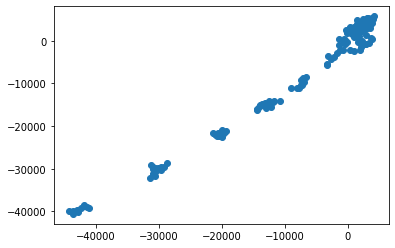

In [14]:
import matplotlib.pyplot as plt
#That neext line is only for jupyter notebooks, if you are using another editor, you'll use: plt.show() at the end of all your plotting commands to have the figure pop up in another window
%matplotlib inline 
plt.scatter(y_test, predictions)

**Residual Histogram**<br>
Create distplot with 50 bins for the error (real value - predicted).<br>
We want to see one long column exculy on the zero.

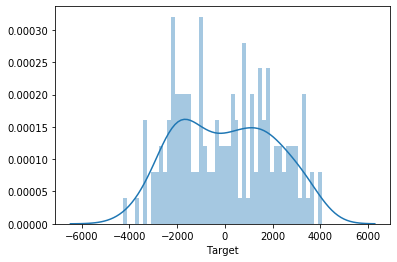

In [15]:
import seaborn as sb
sb.distplot(y_test-predictions,bins=50)

## Find the perfect degree

In [57]:
grade = []
max_degree = int(input('Enter maximum degree to check: '))

for i in range(1,max_degree):
    cubic = PolynomialFeatures(degree=i)
    X_cubic = cubic.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_cubic, df['Target'], test_size=0.3, random_state=42)
    model = skl.LinearRegression()
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    score = model.score(X_test,y_test)
    grade.append(score)
    print ('Degree: {} ,Score: {}'.format(i,score))

Enter maximum degree to check: 5
Degree: 1 ,Score: 0.7776978851930219
Degree: 2 ,Score: 0.9794829525079969
Degree: 3 ,Score: 0.9980545329152584
Degree: 4 ,Score: 0.9973233052900232


### Use a figure to watch the results

Text(0, 0.5, 'Score')

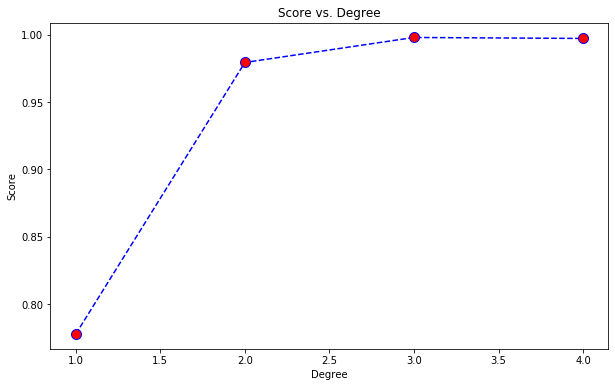

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,max_degree),grade,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Score')